# PGP AI & ML - Natural Language Processing and Speech Recognition - Cohort 5 - Tamal Acharya

# **Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.**

# DESCRIPTION

***Help Twitter Combat Hate Speech Using NLP and Machine Learning.***

**Problem Statement**:

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium to spread hate.

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

**Domain:** Social Media

**Analysis to be done:** Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

**Content:**

id: identifier number of the tweet
Label: 0 (non-hate) /1 (hate)
Tweet: the text in the tweet

**Tasks:**

1. Load the tweets file using read_csv function from Pandas package.

2. Get the tweets into a list for easy text cleanup and manipulation.

3. To cleanup:

    1. Normalize the casing.

    2. Using regular expressions, remove user handles. These begin with '@’.

    3. Using regular expressions, remove URLs.

    4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms

    5. Remove stop words.

    6. Remove redundant terms like ‘amp’, ‘rt’, etc.

    7. Remove ‘#’ symbols from the tweet while retaining the term.

4. Extra cleanup by removing terms with a length of 1.

5. Check out the top terms in the tweets:

    1. First, get all the tokenized terms into one large list.

    2. Use the counter and find the 10 most common terms.

6. Data formatting for predictive modeling:

    1. Join the tokens back to form strings. This will be required for the vectorizers.

    2. Assign x and y.

    3. Perform train_test_split using sklearn.

7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

    1. Import TF-IDF vectorizer from sklearn.

    2. Instantiate with a maximum of 5000 terms in your vocabulary.

    3. Fit and apply on the train set.

    4. Apply on the test set.

8. Model building: Ordinary Logistic Regression

    1. Instantiate Logistic Regression from sklearn with default parameters.

    2. Fit into the train data.

    3. Make predictions for the train and the test set.

9. Model evaluation: Accuracy, recall, and f_1 score.

    1. Report the accuracy on the train set.

    2. Report the recall on the train set: decent, high, or low.

    3. Get the f1 score on the train set.

10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

    1. Adjust the appropriate class in the LogisticRegression model.

11. Train again with the adjustment and evaluate.

    1. Train the model on the train set.

    2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

12. Regularization and Hyperparameter tuning:

    1. Import GridSearch and StratifiedKFold because of class imbalance.

    2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
    3. Use a balanced class weight while instantiating the logistic regression.

13. Find the parameters with the best recall in cross-validation.

    1. Choose ‘recall’ as the metric for scoring.

    2. Choose a stratified 4 fold cross-validation scheme.

    3. Fit into the train set.

14. What are the best parameters?

15. Predict and evaluate using the best estimator.

    1. Use the best estimator from the grid search to make predictions on the test set.

    2. What is the recall on the test set for the toxic comments?

    3. What is the f_1 score?

# ***Install Dependancies required for this analysis***

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
import re
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import seaborn as sns
from sklearn.metrics import recall_score
from imblearn.pipeline import make_pipeline

In [3]:
#Download the NLTK Modules required for the analysis
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tamal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tamal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# ***Task 1: Load the tweets file using read_csv function from Pandas package.***

In [4]:
#Load the data
twitter = pd.read_csv("C:/Users/Tamal/Downloads/Twitter Hate Speech/TwitterHate.csv")
twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#Check for null values
print("Size of data is: ", twitter.shape, "\n" )
print(twitter.isnull().sum())

Size of data is:  (31962, 3) 

id       0
label    0
tweet    0
dtype: int64


In [6]:
#Drop irrelevant variables. Here Id is not required for analysis
twitter.drop(['id'],axis=1,inplace=True)
twitter.head(3)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty


In [7]:
#Check if the label data is Balanced/Unbalanced. Checking class imbalance
twitter.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

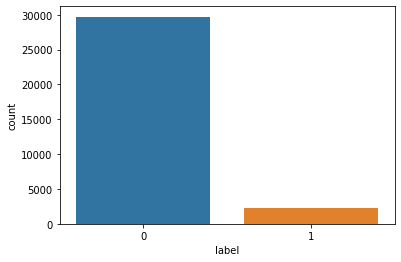

In [12]:
#Plot the label data to visualise the class imbalance
sns.countplot(x="label", data=twitter)

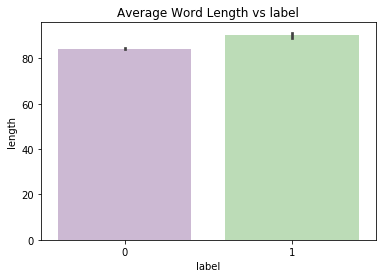

In [13]:
#Exploratory Data Analysis
twitter['length'] = twitter['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = twitter,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

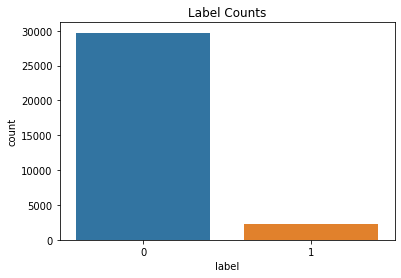

In [14]:
#bar graph to count positive negative label
fig2 = sns.countplot(x= 'label',data = twitter)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [45]:
#count of words disrtibution
import chart_studio
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#print(__version__)
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
twitter['length'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [21]:
def vectorization(table):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(table.tweet)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [22]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

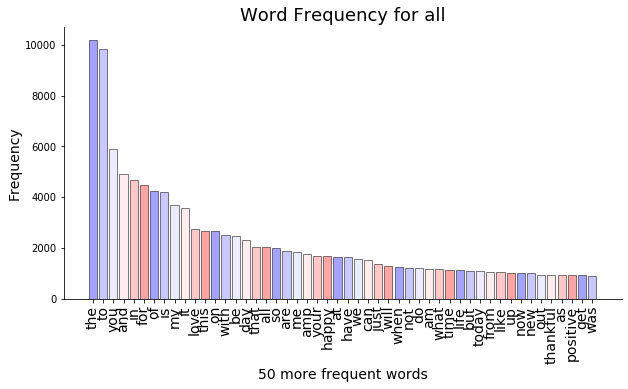

In [24]:
word_frequency = vectorization(twitter).sort_values(0, ascending = False)
#word_frequency_pos = vectorization(training_data[training_data['label'] == '1']).sort_values(0, ascending = False)
#word_frequency_neg = vectorization(training_data[training_data['label'] == '1']).sort_values(0, ascending = False)

    #Graph with frequency words all, positive and negative tweets and get the frequency
graph(word_frequency, 'all')
#graph(word_frequency_pos, 'positive')
#graph(word_frequency_neg, 'negative')

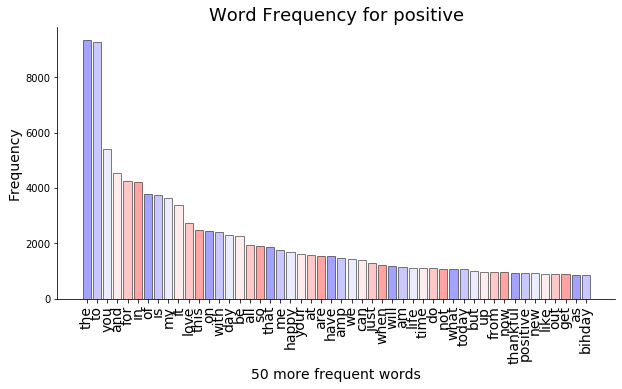

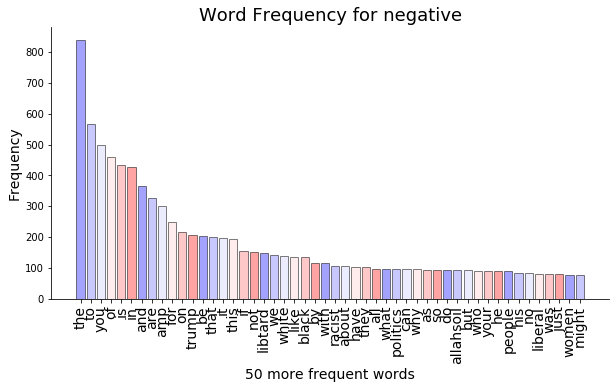

In [26]:
word_frequency_pos = vectorization(twitter[twitter['label'] == 0]).sort_values(0, ascending = False)
word_frequency_neg = vectorization(twitter[twitter['label'] == 1]).sort_values(0, ascending = False)

graph(word_frequency_pos, 'positive')
graph(word_frequency_neg, 'negative')

In [27]:
def regression_graph(table):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=14)
    plt.ylabel("Frequency for Negative Tweets", size=14)
    plt.title("Word frequency in Positive vs. Negative Tweets", size=14)
    plt.grid(False)
    sns.despine()

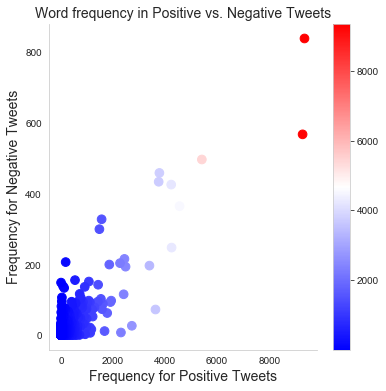

In [28]:
table_regression = pd.concat([word_frequency_pos, word_frequency_neg], axis=1, sort=False)
table_regression.columns = ["Positive", "Negative"]
regression_graph(table_regression)

In [29]:
twitter['cleaned_tweet'] = twitter.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [30]:
#Hashtags
#Select all words from normal tweet
normal_words = ' '.join([word for word in twitter['cleaned_tweet'][twitter['label'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

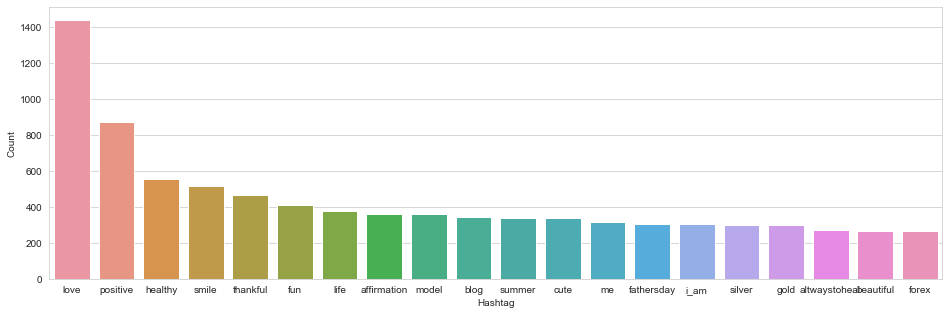

In [31]:
#Select top 20 most frequent hashtags and plot them   
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [33]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in twitter['cleaned_tweet'][twitter['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 128 missing from current font.

C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 128 missing from current font.



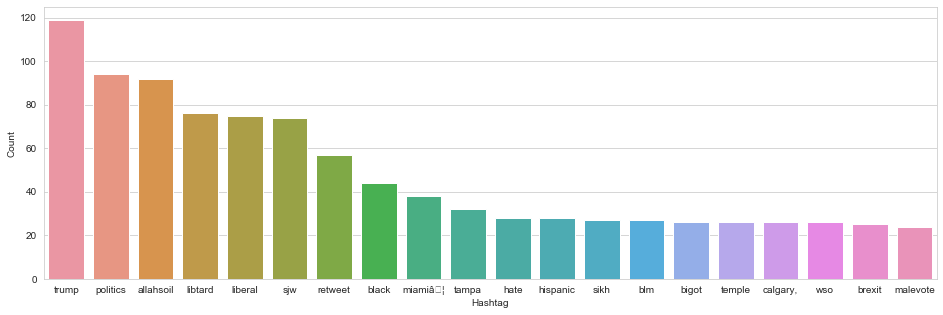

In [34]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
plt.show()

Normal words


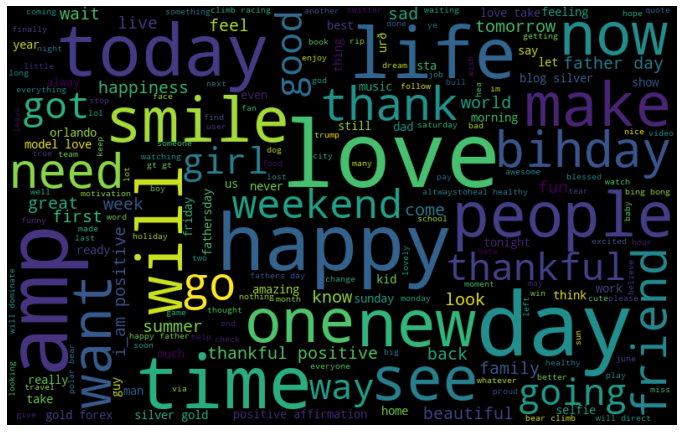

In [36]:
#Finding common words in both classes of tweets using Visualization
#Normal Tweets
normal_words = ' '.join([word for word in twitter['cleaned_tweet'][twitter['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Negative words


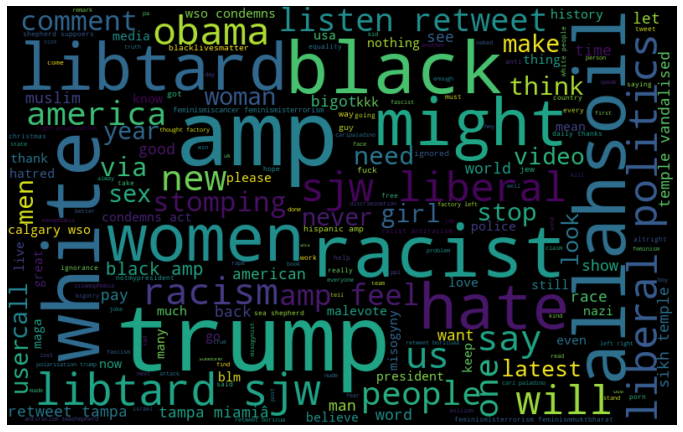

In [37]:
#Racist/Sexist Tweets
negative_words = ' '.join([word for word in twitter['cleaned_tweet'][twitter['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Negative words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Task 3: To cleanup:

    Normalize the casing.

    Using regular expressions, remove user handles. These begin with '@’.

    Using regular expressions, remove URLs.

    Using TweetTokenizer from NLTK, tokenize the tweets into individual terms

    Remove stop words.

    Remove redundant terms like ‘amp’, ‘rt’, etc.

    Remove ‘#’ symbols from the tweet while retaining the term.

In [8]:
stopWords = stopwords.words('english')
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

In [9]:
def clean_text(tweet):
    tweet = tweet.lower()
    removedCharReference = re.sub(r'&(([A-Za-z0-9]+);)+',"",tweet)
    userHandleRemoved = re.sub(r"(@[A-Za-z0-9]+)","",removedCharReference)
    removedURL = re.sub("http\S+","",userHandleRemoved)
    removedPunctuation = re.sub("[^0-9a-zA-Z \t]", " ", removedURL)
    removedStopWords = [word for word in tokenizer.tokenize(removedPunctuation) if word not in stopWords]
    lemmatizedWords = ' '.join([lemmatizer.lemmatize(word) for word in removedStopWords])
    return lemmatizedWords

twitter['cleanedText'] = twitter['tweet'].apply(clean_text)
twitter.head()

,label,tweet,cleanedText
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society motivation


In [10]:
#Save the cleaned data
twitterfinal = twitter[['cleanedText','label']]
twitterfinal.head()

,cleanedText,label
0,father dysfunctional selfish drag kid dysfunct...,0
1,thanks lyft credit use cause offer wheelchair ...,0
2,bihday majesty,0
3,model love u take u time ur,0
4,factsguide society motivation,0


# Task 4: Extra cleanup by removing terms with a length of 1.

In [11]:
def wordLength(words):
    selectedWords = ' '.join([word for word in words.split() if len(word)>1])
    return selectedWords

twitterfinal['cleanedText'] = twitterfinal['cleanedText'].apply(wordLength)
twitterfinal.head()

C:\Users\Tamal\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,cleanedText,label
0,father dysfunctional selfish drag kid dysfunct...,0
1,thanks lyft credit use cause offer wheelchair ...,0
2,bihday majesty,0
3,model love take time ur,0
4,factsguide society motivation,0


In [12]:
#Check if there are any null values
print("Check for null values in tweets: ", twitterfinal.cleanedText.isnull().any(), "\n")
print(twitterfinal.isnull().any())

Check for null values in tweets:  False 

cleanedText    False
label          False
dtype: bool


# Task 5: Check out the top terms in the tweets:

    First, get all the tokenized terms into one large list.

    Use the counter and find the 10 most common terms.

In [13]:
#Using CountVectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit(twitterfinal["cleanedText"])
print("Length of Vocabulary is: ", len(bag_of_words.vocabulary_), "\n")
bag_of_words_transform = bag_of_words.transform(twitterfinal["cleanedText"])

Length of Vocabulary is:  36418 



In [14]:
%%time

pos_batches = np.linspace(0,31962,100).astype(int)

i=0
pos_tf = []

while i < len(pos_batches)-1:
    batch_result = np.sum(bag_of_words_transform[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    #print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

Wall time: 7.24 s


In [15]:
frequentWords = np.sum(pos_tf,axis=0)
term_freq = pd.DataFrame([frequentWords],columns=vectorizer.get_feature_names()).transpose()
term_freq.columns = ['FrequentWords']
term_freq.sort_values(by='FrequentWords', ascending=False).iloc[:10]

,FrequentWords
day,2875
love,2873
happy,1706
life,1262
time,1262
like,1157
today,1105
get,1003
new,1003
father,957


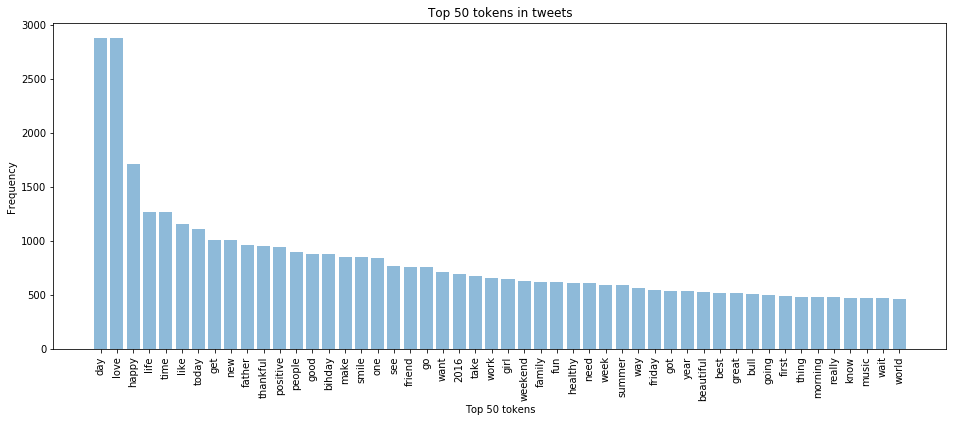

In [13]:
#Top 50 tokens in tweet
tokens = np.arange(50)
plt.figure(figsize=(16, 6))

plt.bar(tokens, term_freq.sort_values(by='FrequentWords', ascending=False)['FrequentWords'][:50], align='center', alpha=0.5)
plt.xticks(tokens, term_freq.sort_values(by='FrequentWords', ascending=False)['FrequentWords'][:50].index,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 50 tokens')
plt.title('Top 50 tokens in tweets');

In [16]:
#Using TFIDF- Word Weightage
tfid_model = TfidfTransformer().fit(bag_of_words_transform)
word_counts = pd.DataFrame(tfid_model.idf_, index=bag_of_words.get_feature_names(),columns=["WordWeight"])
word_counts_sorted = word_counts.sort_values(ascending = True, by=['WordWeight'])
word_counts_sorted.head(10)

,WordWeight
love,3.470957
day,3.499879
happy,3.990832
time,4.262455
life,4.305014
today,4.375653
like,4.376568
get,4.535001
new,4.540381
positive,4.544705


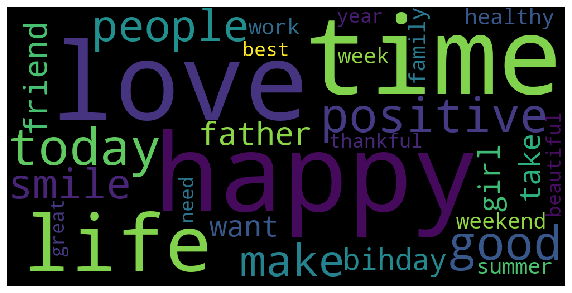

In [65]:
# Visualize the 10 most frequently used words 
freqWords = word_counts_sorted.reset_index()
freqWords = freqWords.iloc[:30,:]
word_in_list = freqWords['index'].to_list()
unique_words=(" ").join(word_in_list)
wordcloud = WordCloud(width = 1000, height = 500, max_words=100).generate(unique_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Task 6: Data formatting for predictive modeling:

    Join the tokens back to form strings. This will be required for the vectorizers.

    Assign x and y.

    Perform train_test_split using sklearn.

In [17]:
#Separate the features and label
features = twitterfinal.iloc[:,[0]]
label = twitterfinal.iloc[:,[1]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 32)
print(X_train.shape, X_test.shape, "\t", y_train.shape, y_test.shape)

(25569, 1) (6393, 1) 	 (25569, 1) (6393, 1)


# Task 7: We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

    Import TF-IDF vectorizer from sklearn.
    Instantiate with a maximum of 5000 terms in your vocabulary.
    Fit and apply on the train set.
    Apply on the test set.

In [19]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=5000)
tfidf_vect = tfidfvectorizer.fit(X_train.cleanedText)
tfidf_train = tfidf_vect.transform(X_train.cleanedText) 
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_train.toarray(),columns = tfidf_tokens)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

        00  000   01  039   05   06   08   10  100  1000  ...  yyc  zara  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   ...   
25564  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
25565  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
25566  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
25567  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   
25568  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   0.0   

       zealand  zelda  zen      zero  zionism  zone  zoo  zoro  
0 

In [20]:
tfidf_test = tfidf_vect.transform(X_test.cleanedText) 
#tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=5000)
#tfidf_vect = tfidfvectorizer.fit(X_test.cleanedText)
#tfidf_test = tfidf_vect.transform(X_test.cleanedText) 
#tfidf_tokens = tfidfvectorizer.get_feature_names()
#df_tfidfvect = pd.DataFrame(data = tfidf_test.toarray(),columns = tfidf_tokens)
#print("\nTD-IDF Vectorizer\n")
#print(df_tfidfvect)

# Task 8: Model building: Ordinary Logistic Regression

    Instantiate Logistic Regression from sklearn with default parameters.

    Fit into the train data.

    Make predictions for the train and the test set.

In [21]:
model = LogisticRegression()
model.fit(tfidf_train,y_train)

C:\Users\Tamal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [22]:
print("Train score: ", model.score(tfidf_train,y_train))
print("Test score: ", model.score(tfidf_test,y_test))

Train score:  0.9569791544448355
Test score:  0.9529172532457375


In [23]:
#Iterate through various random states
import warnings
warnings.filterwarnings("ignore")
for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    
    tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=5000)
    tfidf_vect = tfidfvectorizer.fit(X_train.cleanedText)
    tfidf_train = tfidf_vect.transform(X_train.cleanedText)
    tfidf_test = tfidf_vect.transform(X_test.cleanedText) 

    model = LogisticRegression()
    model.fit(tfidf_train,y_train)
    
    trainScore = model.score(tfidf_train,y_train)
    testScore = model.score(tfidf_test,y_test)
    
    if testScore > trainScore and testScore > 0.95:
        print("Test Score {} , Train Score {}, Random State {}".format(testScore,trainScore,i))

Test Score 0.9590176755826686 , Train Score 0.9565880558488795, Random State 49
Test Score 0.9566713592992335 , Train Score 0.9555320896397982, Random State 60


In [24]:
#Build a model with random state = 49 as it isa  generalised model
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=49)
    
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=5000)
tfidf_vect = tfidfvectorizer.fit(X_train.cleanedText)
tfidf_train = tfidf_vect.transform(X_train.cleanedText)
tfidf_test = tfidf_vect.transform(X_test.cleanedText) 

model = LogisticRegression()
model.fit(tfidf_train,y_train)
    
print("Train Score: ", model.score(tfidf_train,y_train))
print("Test Score: ", model.score(tfidf_test,y_test))    

Train Score:  0.9565880558488795
Test Score:  0.9590176755826686


In [77]:
#Build a model with random state = 60 as it isa  generalised model
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=60)
    
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=5000)
tfidf_vect = tfidfvectorizer.fit(X_train.cleanedText)
tfidf_train = tfidf_vect.transform(X_train.cleanedText)
tfidf_test = tfidf_vect.transform(X_test.cleanedText) 

model = LogisticRegression()
model.fit(tfidf_train,y_train)
    
print("Train Score: ", model.score(tfidf_train,y_train))
print("Test Score: ", model.score(tfidf_test,y_test))
    

Train Score:  0.9552192107630334
Test Score:  0.9558892538714219


# Task 9: Model evaluation: Accuracy, recall, and f_1 score.

    Report the accuracy on the train set.

    Report the recall on the train set: decent, high, or low.

    Get the f1 score on the train set.

In [25]:
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test , model.predict(tfidf_test)))
print("\n")
print(classification_report(y_test , model.predict(tfidf_test)))


Confusion Matrix

[[5973   12]
 [ 250  158]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5985
           1       0.93      0.39      0.55       408

    accuracy                           0.96      6393
   macro avg       0.94      0.69      0.76      6393
weighted avg       0.96      0.96      0.95      6393



# Task 10: Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

    Adjust the appropriate class in the LogisticRegression model.

Best parameters : {'smote__sampling_strategy': 0.33666666666666667}




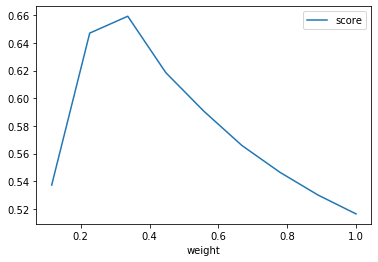

In [26]:
#Using SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
pipe = make_pipeline(SMOTE(random_state=50),
                     LogisticRegression()
                     )

weights = np.linspace(0.005, 1.0, 10)

gsc = GridSearchCV(
    estimator= pipe,
    param_grid={
        'smote__sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(tfidf_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
print("\n")

# Plot the weights vs f1 score
data = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data.plot(x='weight')

# Task 11: Train again with the adjustment and evaluate.

    Train the model on the train set.

    Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

In [46]:
pipe = make_pipeline(
    SMOTE(random_state = 50, sampling_strategy=0.33666666666666667),
    LogisticRegression()
    )

pipe.fit(tfidf_train, y_train)

Pipeline(steps=[('smote',
                 SMOTE(random_state=50, sampling_strategy=0.33666666666666667)),
                ('logisticregression', LogisticRegression())])

In [47]:
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test , pipe.predict(tfidf_test)))
print("\n")
print(classification_report(y_test , pipe.predict(tfidf_test)))


Confusion Matrix

[[5856  129]
 [ 119  289]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5985
           1       0.69      0.71      0.70       408

    accuracy                           0.96      6393
   macro avg       0.84      0.84      0.84      6393
weighted avg       0.96      0.96      0.96      6393



# Task 12: Regularization and Hyperparameter tuning:

    Import GridSearch and StratifiedKFold because of class imbalance.

    Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

    Use a balanced class weight while instantiating the logistic regression.

In [49]:
smote = SMOTE(random_state = 32, sampling_strategy=0.33666666666666667)
x_smote,y_smote = smote.fit_resample(tfidf_train,y_train)

In [63]:
y_smote_frame = pd.DataFrame(y_smote)
#y_smote_frame
y_smote['label'].value_counts()

0    23735
1     7990
Name: label, dtype: int64

In [52]:
#param = {'C':[0.001,0.01,0.1,1,10,], "penalty":["l1","l2"]}
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20], "penalty":["l1","l2", "elasticnet","none"]}
modelLogistic = LogisticRegression(class_weight='balanced')

# Task 13: Find the parameters with the best recall in cross-validation.

    Choose ‘recall’ as the metric for scoring.

    Choose a stratified 4 fold cross-validation scheme.

    Fit into the train set.

In [55]:
#On unbalanced data
grisSearchModel = GridSearchCV(modelLogistic, param, scoring='recall', refit=True, cv=4)
grisSearchModel.fit(tfidf_train,y_train)
print('Best recall: {:.4}, with best parameters: {}'.format(grisSearchModel.best_score_, grisSearchModel.best_params_))

Best recall: 0.7808, with best parameters: {'C': 1, 'penalty': 'l2'}


In [56]:
#On balanced data
grisSearchBalModel = GridSearchCV(modelLogistic, param, scoring='recall', refit=True, cv=4)
grisSearchBalModel.fit(x_smote,y_smote)
print('Best recall: {:.4}, with best parameters: {}'.format(grisSearchBalModel.best_score_, grisSearchBalModel.best_params_))

Best recall: 0.993, with best parameters: {'C': 0.001, 'penalty': 'none'}


# Task 14: What are the best parameters?

In [65]:
print("Best parameters for unbalanced data is: {}" .format(grisSearchModel.best_params_))
print("Best parameters for balanced data is: {}" .format(grisSearchBalModel.best_params_))

Best parameters for unbalanced data is: {'C': 1, 'penalty': 'l2'}
Best parameters for balanced data is: {'C': 0.001, 'penalty': 'none'}


# Task 15: Predict and evaluate using the best estimator.

    Use the best estimator from the grid search to make predictions on the test set.
    What is the recall on the test set for the toxic comments?
    What is the f_1 score?

In [66]:
finalModel = LogisticRegression(C=0.001, penalty='none')
finalModel.fit(x_smote,y_smote)

print("Train Score: ", finalModel.score(x_smote,y_smote))
print("Test Score: ", finalModel.score(tfidf_test,y_test)) 

Train Score:  0.9851221434200158
Test Score:  0.9383700922884405


In [68]:
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test , finalModel.predict(tfidf_test)))
print("\n")
print(classification_report(y_test , finalModel.predict(tfidf_test)))


Confusion Matrix

[[5719  266]
 [ 128  280]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5985
           1       0.51      0.69      0.59       408

    accuracy                           0.94      6393
   macro avg       0.75      0.82      0.78      6393
weighted avg       0.95      0.94      0.94      6393

